In [0]:
# Run some setup code for this notebook.
import random
import numpy as np
import pandas as pd
from sklearn import datasets

In [0]:
#from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process.kernels import RBF
from sklearn import metrics

In [0]:
iris = datasets.load_iris()

In [4]:
print(iris.keys())
print("Header : ", iris.feature_names)
print("Target : ", iris.target[np.random.choice(150,20)])
print(iris.data.shape)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Header :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target :  [0 0 1 0 1 1 0 0 1 1 2 0 1 1 0 1 1 0 2 1]
(150, 4)


In [5]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# Split Training, Test Data

num_train,_ = iris.data.shape

indices = np.random.choice(num_train, num_train)

train_X = iris.data[indices[:-20]].astype("float32")
train_y = iris.target[indices[:-20]]
test_X = iris.data[indices[-20:]].astype("float32")
test_y = iris.target[indices[-20:]]

print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(130, 4)
(130,)
(20, 4)
(20,)


In [0]:
## Another way
from sklearn.model_selection import train_test_split
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [0]:
iris_accuracy = []

In [0]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
iris_accuracy.append(score)
print(score)

0.9666666666666667


In [0]:
from sklearn.svm import SVC
svc_clf = SVC(kernel="linear", C=0.025)
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
iris_accuracy.append(score)
print(score)

0.9666666666666667


In [0]:
from sklearn.svm import SVC
svc_clf = SVC(gamma=2, C=1)
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
iris_accuracy.append(score)
print(score)

0.9666666666666667


In [0]:
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel)
gpc.fit(X_train, y_train)
y_pred = gpc.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
iris_accuracy.append(score)
print(score)

0.9333333333333333


In [0]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
iris_accuracy.append(score)
print(score)

0.9666666666666667


In [0]:
rfc = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
iris_accuracy.append(score)
print(score)

0.9333333333333333


In [0]:
mpl = MLPClassifier(alpha=1)
mpl.fit(X_train, y_train)
y_pred = mpl.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
iris_accuracy.append(score)
print(score)

0.9333333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
iris_accuracy.append(score)
print(score)

0.9333333333333333


In [0]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
iris_accuracy.append(score)
print(score)

0.9666666666666667


In [0]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
iris_accuracy.append(score)
print(score)

0.9


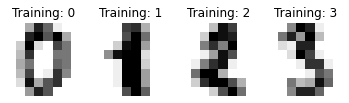

In [0]:
############################################
########### D I G I T S ####################
############################################
import matplotlib.pyplot as plt

digits = datasets.load_digits()
_, axes = plt.subplots(1, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[:], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=False)

In [0]:
digits_accuracy = []

In [0]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
digits_accuracy.append(score)
print(score)

0.9666666666666667


In [0]:
from sklearn.svm import SVC
svc_clf = SVC(kernel="linear", C=0.025)
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
digits_accuracy.append(score)
print(score)

0.9305555555555556


In [0]:
from sklearn.svm import SVC
svc_clf = SVC(gamma=2, C=1)
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
digits_accuracy.append(score)
print(score)

0.18611111111111112


In [0]:
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel)
gpc.fit(X_train, y_train)
y_pred = gpc.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
digits_accuracy.append(score)
print(score)

0.10277777777777777


In [0]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
digits_accuracy.append(score)
print(score)

0.6222222222222222


In [0]:
rfc = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
digits_accuracy.append(score)
print(score)

0.7861111111111111


In [0]:
mpl = MLPClassifier(alpha=1)
mpl.fit(X_train, y_train)
y_pred = mpl.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
digits_accuracy.append(score)
print(score)

0.9083333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
digits_accuracy.append(score)
print(score)

0.2777777777777778


In [0]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
digits_accuracy.append(score)
print(score)

0.8138888888888889


In [0]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
digits_accuracy.append(score)
print(score)

0.7861111111111111


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [0]:
############################################
########### B O S T O N ####################
############################################
boston = datasets.load_boston()

In [0]:
data = boston.data
target = boston.target
df = pd.DataFrame(target)
df.describe()

,0
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [0]:
low = 0
medium = 1
high = 2
new_target = []
for x in target:
  if x<20:
    new_target.append(low)
  elif x<35:
    new_target.append(medium)
  else:
    new_target.append(high)   
print(new_target[:10])
print(target[:10])

[1, 1, 1, 1, 2, 1, 1, 1, 0, 0]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


In [0]:
X_train, X_test, y_train, y_test = train_test_split(data, new_target, test_size=0.2, shuffle=False)

In [0]:
boston_accuracy = []

In [0]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
boston_accuracy.append(score)
print(score)

0.7352941176470589


In [0]:
from sklearn.svm import SVC
svc_clf = SVC(kernel="linear", C=0.025)
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
boston_accuracy.append(score)
print(score)

0.8333333333333334


In [0]:
from sklearn.svm import SVC
svc_clf = SVC(gamma=2, C=1)
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
boston_accuracy.append(score)
print(score)

0.2549019607843137


In [0]:
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel)
gpc.fit(X_train, y_train)
y_pred = gpc.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
boston_accuracy.append(score)
print(score)

0.6568627450980392


In [0]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
boston_accuracy.append(score)
print(score)

0.8725490196078431


In [0]:
rfc = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
boston_accuracy.append(score)
print(score)

0.8137254901960784


In [0]:
mpl = MLPClassifier(alpha=1)
mpl.fit(X_train, y_train)
y_pred = mpl.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
boston_accuracy.append(score)
print(score)

0.6862745098039216


In [0]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
boston_accuracy.append(score)
print(score)

0.22549019607843138


In [0]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
boston_accuracy.append(score)
print(score)

0.7843137254901961


In [0]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
boston_accuracy.append(score)
print(score)

0.7941176470588235


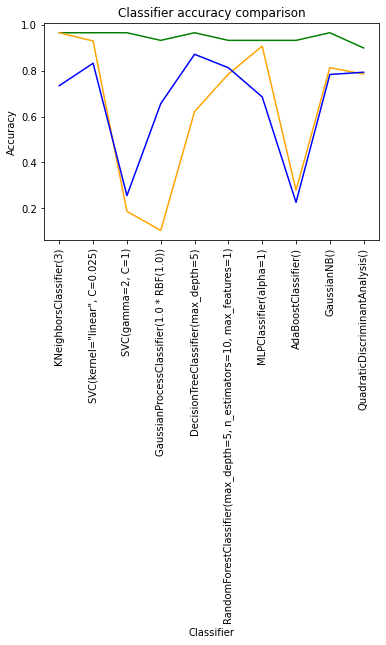

In [0]:
import matplotlib.pyplot as plt

classifiers = ['KNeighborsClassifier(3)', 'SVC(kernel="linear", C=0.025)', 'SVC(gamma=2, C=1)', 'GaussianProcessClassifier(1.0 * RBF(1.0))', 'DecisionTreeClassifier(max_depth=5)', 'RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)', 'MLPClassifier(alpha=1)', 'AdaBoostClassifier()', 'GaussianNB()', 'QuadraticDiscriminantAnalysis()']
plt.plot(classifiers, iris_accuracy, color='g')
plt.plot(classifiers, digits_accuracy, color='orange')
plt.plot(classifiers, boston_accuracy, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier accuracy comparison')
plt.show()